In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [5]:
df = pd.read_csv('C:\\Users\\Gaming\\Documents\\Jupiter\\archive\\london_crime_by_lsoa.csv')
print('Data downloaded and read into a dataframe')

Data downloaded and read into a dataframe


In [6]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


## Area Plot

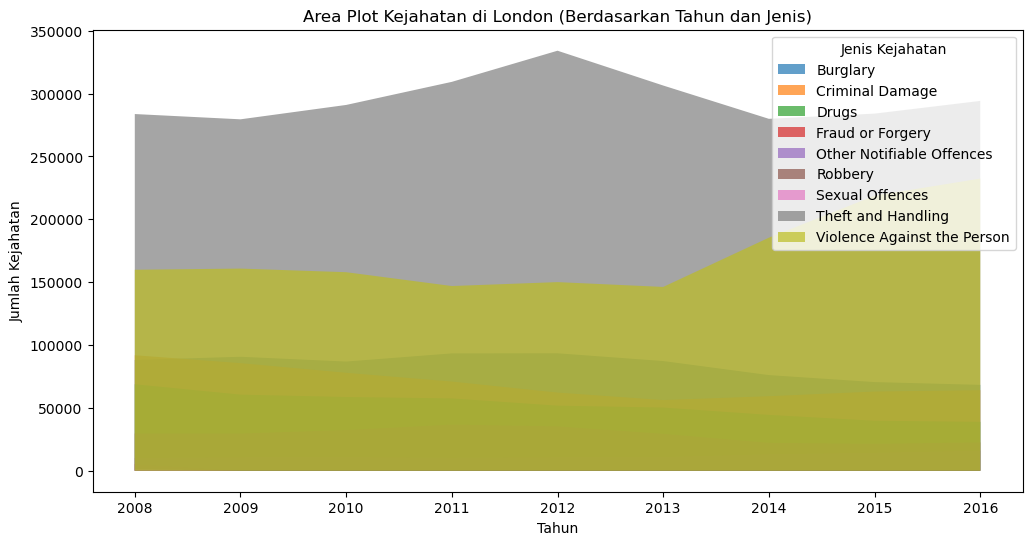

In [8]:
# Mengelompokkan data berdasarkan tahun dan jenis kejahatan
df_grouped = df.groupby(['year', 'major_category'])['value'].sum().unstack()

# Setel plot area
plt.figure(figsize=(12, 6))

# Loop melalui setiap jenis kejahatan
for crime_type in df_grouped.columns:
    plt.fill_between(df_grouped.index, df_grouped[crime_type], label=crime_type, alpha=0.7)

# Tambahkan judul dan label sumbu
plt.title('Area Plot Kejahatan di London (Berdasarkan Tahun dan Jenis)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')

# Tambahkan legenda
plt.legend(title='Jenis Kejahatan')

# Tampilkan plot
plt.show()

#### Dari area plot di atas dapat diketahui bahwa jenis kejahatan yang paling banyak terjadi di london untuk rentang tahun 2008 sampai dengan 2016 adalah Thelft and Handling dengan jumlah kejahatan tertinggi pada tahun 2012 dengan jumlah sekitar 340000 


## Histogram

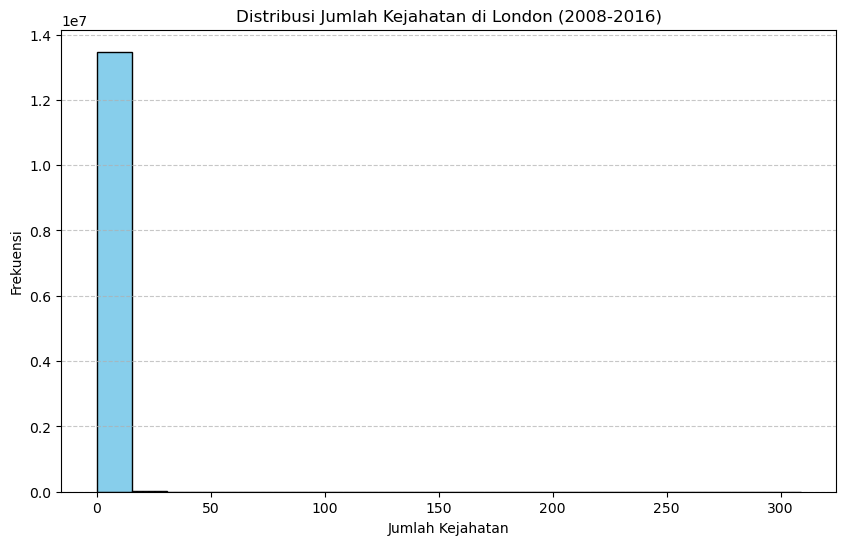

In [8]:
# Pilih kolom 'Value' yang berisi jumlah kejahatan
crime_values = df['value']

# Buat histogram
plt.figure(figsize=(10, 6))
plt.hist(crime_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Jumlah Kejahatan di London (2008-2016)')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot histogram
plt.show()

### Dari histogram diatas dapat diketahui bahwa pada rentang tahun 2008-2016 distribusi jumlah kejahatan paling sering terjadi adalah pada rentang 0-50 dengan frekuensi sekitar 1.3

## Bar Chart

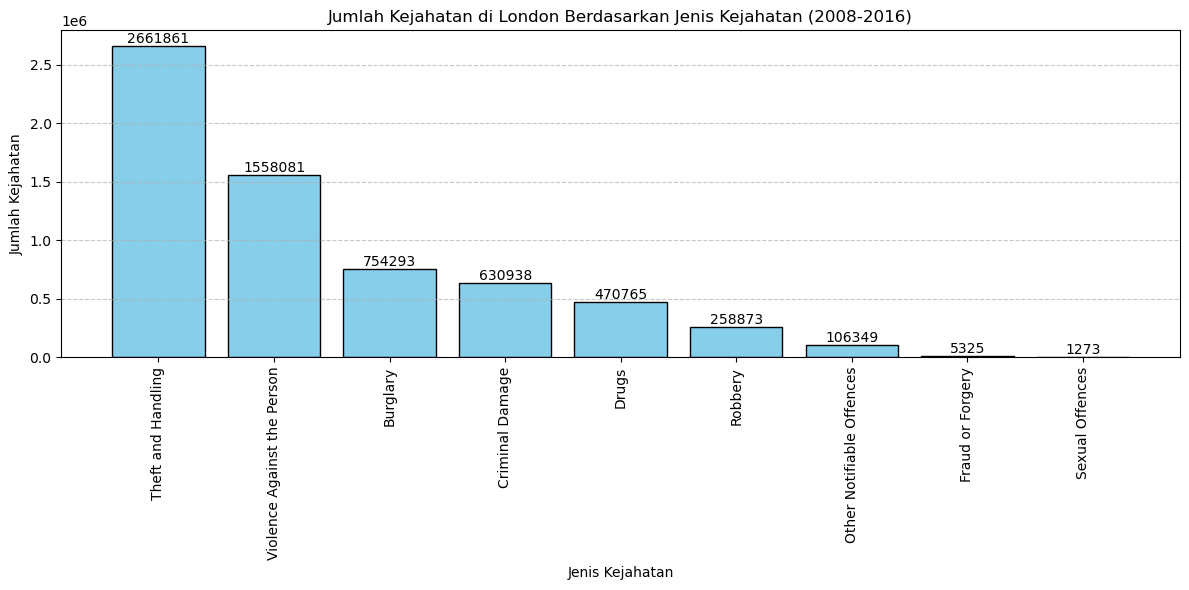

In [7]:
# Kelompokkan data berdasarkan jenis kejahatan dan hitung jumlahnya
crime_counts = df.groupby('major_category')['value'].sum().sort_values(ascending=False)

# Buat bar chart
plt.figure(figsize=(12, 6))
plt.bar(crime_counts.index, crime_counts.values, color='skyblue', edgecolor='black')
plt.title('Jumlah Kejahatan di London Berdasarkan Jenis Kejahatan (2008-2016)')
plt.xlabel('Jenis Kejahatan')
plt.ylabel('Jumlah Kejahatan')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan label jumlah kejahatan di atas batang
for i, v in enumerate(crime_counts.values):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Dari bar chart diatas dapat diketahui bahwa pada periode 2008-2016 jenis kejahatan yang paling sering terjadi di london adalah Thelft and Handling dengan total kejahatan 2661861

## Pie Chart

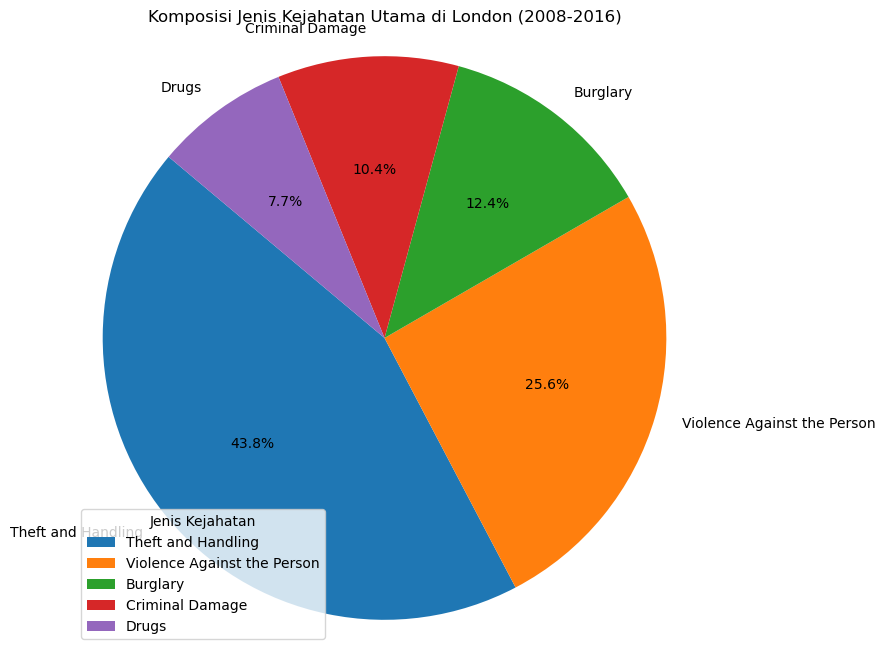

In [9]:
# Kelompokkan data berdasarkan jenis kejahatan dan hitung jumlahnya
crime_counts = df.groupby('major_category')['value'].sum().sort_values(ascending=False)

# Ambil 5 kategori kejahatan utama
top_5_crimes = crime_counts.head(5)

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_crimes, labels=top_5_crimes.index, autopct='%1.1f%%', startangle=140)
plt.title('Komposisi Jenis Kejahatan Utama di London (2008-2016)')

# Tampilkan legend
plt.legend(title='Jenis Kejahatan', loc='best')

# Tampilkan pie chart
plt.axis('equal')  # Untuk membuat lingkaran menjadi lingkaran sempurna
plt.show()

### Dari pie chart diatas dapat diketahui bahwa jenis kejahatan yang paling sering terjadi pada periode 2008-2016 di london adalah theft and handling dengan presentasi 43,8 % dan jenis kejahatan terendah adalah drugs dengan presentasi 7,7 %

## Box Plot

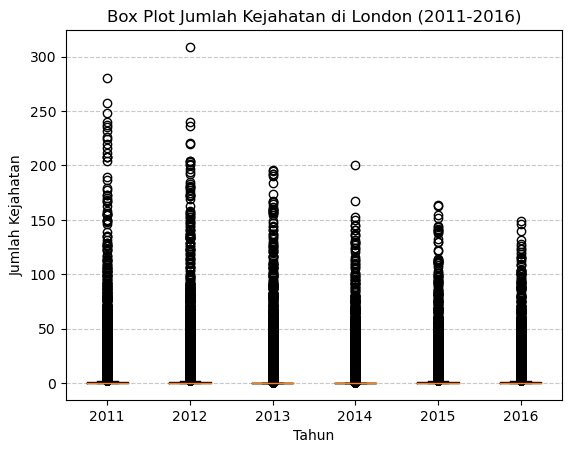

In [25]:
# Filter data hanya untuk tahun 2011 hingga 2016
df = df[(df['year'] >= 2011) & (df['year'] <= 2016)]

# Buat box plot
plt.boxplot([df[df['year'] == year]['value'] for year in range(2011, 2017)], labels=list(range(2011, 2017)))
plt.title('Box Plot Jumlah Kejahatan di London (2011-2016)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Dari box plot diatas dapat diketahui pada periode dari 2011-2016 terdapat jumlah kejahatan yang jauh lebih tinggi yaitu pada tahun 2012. 

## Scatter Plot

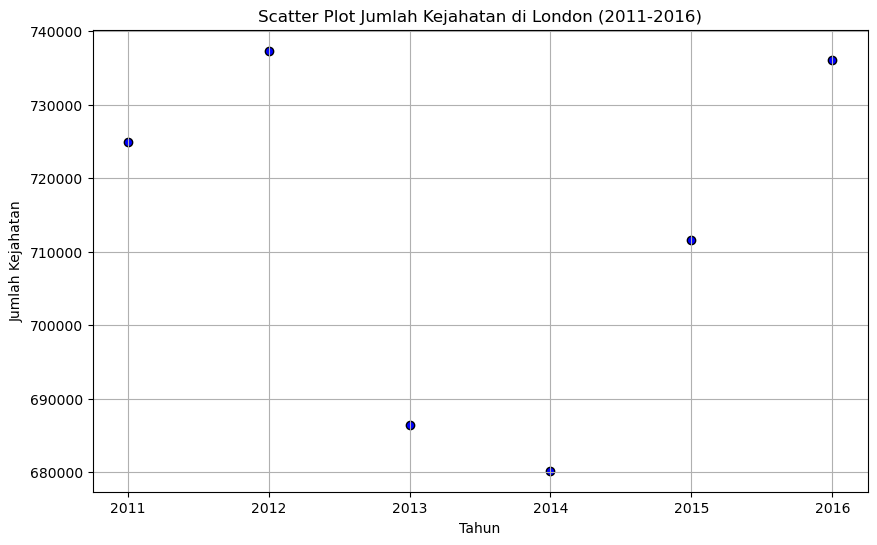

In [27]:
# Pilih kolom yang akan diplot, misalnya, Jumlah Kejahatan dan Tahun
crime_counts = df.groupby('year')['value'].sum()
years = crime_counts.index

# Buat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(years, crime_counts, c='blue', marker='o', edgecolors='black')
plt.title('Scatter Plot Jumlah Kejahatan di London (2011-2016)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.grid(True)
plt.show()

### Dari scatter plot diatas dapat diketahui bahwa dari tahun 2012 ke 2014 di london terjadi penurunan jumlah kejahata yang lumayan drastis lalu pada tahun berikutnya sampai dengan tahun 2016 terjadi peningkatan jumlah kejahatan di london.

## Folium Maps

In [28]:
# Buat peta dengan lokasi tengah di London
world_map = folium.Map(location=[51.5074, -0.1278], zoom_start=11)

# Tampilkan peta
world_map